In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from datasets import Dataset, NetflixData, NetflixGenreData
X_data = NetflixData(small=True)
Z_data = NetflixGenreData(small=True)

In [7]:
# down-sampling by constraints

sum_u, sum_v = X_data.X.sum

# idx_u = sum_u > 130
# idx_v = sum_v > 200

idx_u = sum_u > 40
idx_v = sum_v > 60

print("original shape:", X_data.X.shape)
print("filtered shape:", (sum(idx_u), sum(idx_v)))

X_data.sample(idx=idx_u, axis=0)
print("filtered shape:", X_data.X.shape)
X_data.sample(idx=idx_v, axis=1)
print("filtered shape:", X_data.X.shape)
Z_data.sample(idx=idx_v, axis=1)
print("filtered shape:", Z_data.X.shape)

original shape: (9980, 3362)
filtered shape: (3690, 1069)
[I] sampling with given indices
filtered shape: (3690, 3362)
[I] sampling with given indices
filtered shape: (3690, 1069)
[I] sampling with given indices
filtered shape: (22, 1069)


In [8]:
# down-sampling by random

X_data.sample(n=1000, axis=0)
print(X_data.X.shape)
idx_v = X_data.sample(n=500, axis=1)
print(X_data.X.shape)
Z_data.sample(idx=idx_v, axis=1)
print(Z_data.X.shape)

[I] sampling to size 1000
[I]   Data seed    : 1700632642
(1000, 1069)
[I] sampling to size 500
(1000, 500)
[I] sampling with given indices
(22, 500)


In [9]:
# from models import Asso
# import multiprocessing

# def asso_fit(params):
#     k, tau, w, train_set, val_set = params
#     asso = Asso(k=k, tau=tau, w=w)
#     asso.fit(train_set=train_set, display=True)
#     tpr, fpr = asso.eval(test_set=val_set, triplet=True)

#     with open('.\output\exp01.txt', "w") as f:
#         line = f'k: {k}\t tau: {tau}\t w: {w}\t tpr: {tpr}\t fpr: {fpr}\n'
#         f.write(f'{line}\n')

# params = [[k], tau_list, w_list, [ds_train], [ds_val]]
# params = list(itertools.product(*params))

# pool = multiprocessing.Pool()

# outputs_async = pool.map_async(asso_fit, params)
# outputs = outputs_async.get()
# print("Output: {}".format(outputs))

In [18]:
X_data.test_data.matrix.shape

AttributeError: 'NoneType' object has no attribute 'shape'

[I] cross-validation, sampling positives
[I]   Re-using original config, seed will be ignored.
[I] getting cross-validation indices
[I]   current fold         : 1
[I]   current train size   : 41819
[I]   current val size     : 10455
[I] Mean num of Vs per U in X: 41.8
[I] Mean num of Us per V in X: 83.6
[I] Median num of Vs per U in X: 31.0
[I] Median num of Us per V in X: 46.5


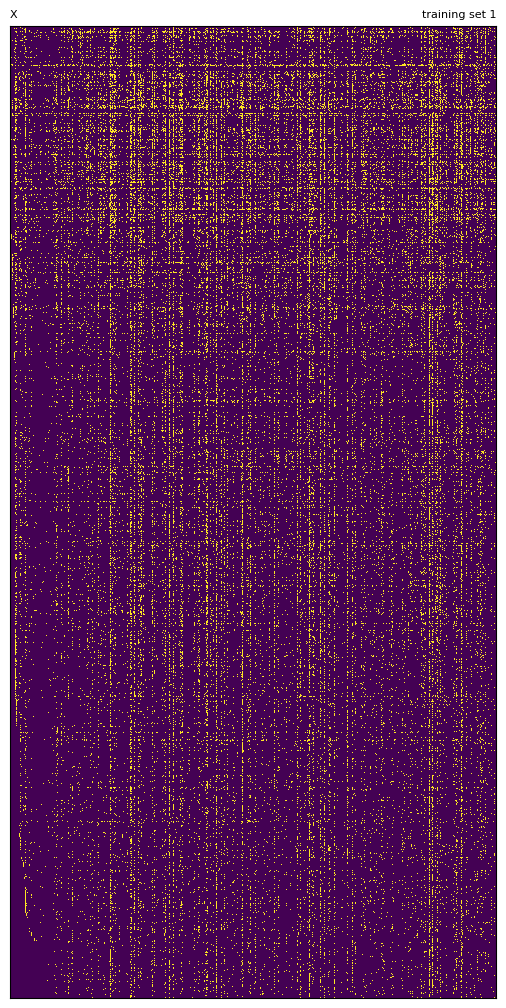

[I] Mean num of Vs per U in X: 10.5
[I] Mean num of Us per V in X: 20.9
[I] Median num of Vs per U in X: 8.0
[I] Median num of Us per V in X: 11.5


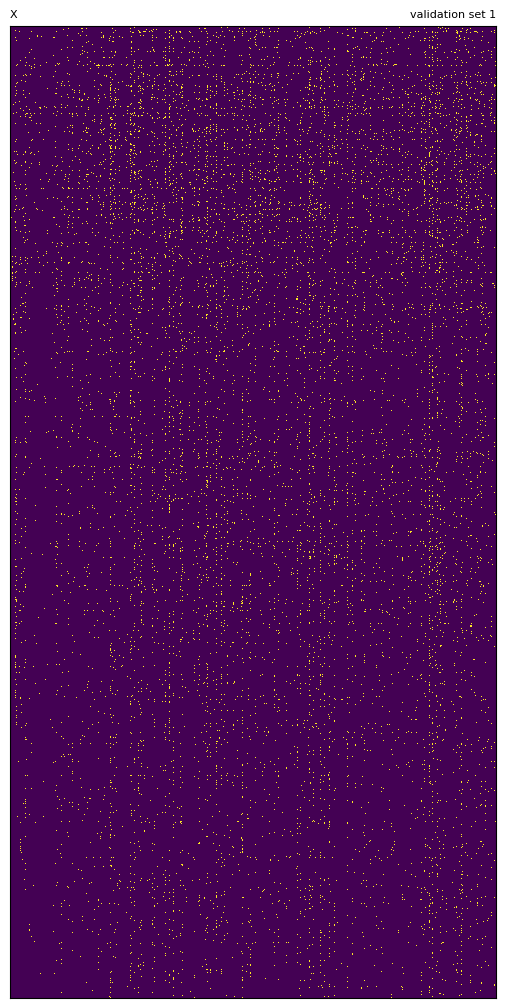

AttributeError: 'NoneType' object has no attribute 'sum'

In [12]:
# k-fold

from models import Asso
import multiprocessing
import itertools
import numpy as np

n_fold = 1

for i in range(n_fold):
    fold = i + 1

    X_data.cross_validation(test_size=0.1, n_folds=5, current_fold=fold, seed=1997)
    # pos_train_val_size = X_data.pos_train_size + X_data.pos_val_size
    # X_data.cv_negative_sample(n_folds=n_fold,
    #                           current_fold=fold,
    #                           train_val_size=int(1.0 * pos_train_val_size),
    #                           test_size=int(0.0 * X_data.pos_test_size), 
    #                           seed=6666, type='popularity')

    ds_train = Dataset()
    ds_train.load_data(X=X_data.train_data, U=X_data.U, V=X_data.V)

    ds_val = Dataset()
    ds_val.load_data(X=X_data.val_data, U=X_data.U, V=X_data.V)

    ds_test = Dataset()
    ds_test.load_data(X=X_data.test_data, U=X_data.U, V=X_data.V)

    ds_train.summarize(title='training set {}'.format(fold), display=True, pixels=2, ordered=True)
    ds_val.summarize(title='validation set {}'.format(fold), display=True, pixels=2, ordered=True)
    ds_test.summarize(title='test set {}'.format(fold), display=True, pixels=2, ordered=True)


    # check tau
    tau_list = [0.20, 0.30, 0.40, 0.50, 0.60]
    for tau in tau_list:
        asso = Asso(k=5, tau=tau, w=[0.5, 0.5])
        asso._fit_prepare(train_set=ds_train, display=True)
    break


    # # grid search
    # k = 50
    # tau_list = [0.20, 0.30, 0.40, 0.50, 0.60]
    # w_list = [[0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
    # for tau in tau_list:
    #     for w in w_list:
    #         asso = Asso(k=k, tau=tau, w=w)
    #         asso._fit_prepare(train_set=ds_train, display=False)
    #         asso.fit(train_set=ds_train, display=True)
    #         tpr, fpr = asso.eval(test_set=ds_val, triplet=True)

    #         str = 'k: {}\t tau: {}\t w: {}\t tpr: {:.2f}\t fpr: {:.2f}\n'.format(k, tau, w, tpr, fpr)

    #         with open('.\output\exp01.txt', "a") as f:
    #             f.write(str)
                
